## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [ ]:
import numpy as np
np.random.random([4,2])

array([[0.9314429 , 0.25417819],
       [0.35651837, 0.252257  ],
       [0.36537854, 0.8224878 ],
       [0.41772301, 0.39047157]])

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

In [ ]:
#무작위로 초기화된 텐서
torch.rand(4,2) #0과 1 사이의 숫자를 균등하게 생성

tensor([[0.3167, 0.6537],
        [0.8222, 0.0593],
        [0.3028, 0.1412],
        [0.7958, 0.5992]])

In [ ]:
torch.randn(5) #평균이 0이고 표준편차가 1인 정규분포를 이용해 생성

tensor([-1.0152, -1.1921, -1.2197,  0.3723, -0.2705])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [ ]:
ft = torch.tensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1, 2, 3])
torch.int64


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
#데이터 타입이 long이고, 0으로 채워진 텐서
x = torch.zeros(4,2,dtype=torch.long)
print(x)
print(x.dtype)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
torch.int64


In [ ]:
x = torch.randn_like(x, dtype=torch.float) #사이즈는 기존의 x랑 똑같고 정규분포된다
x

tensor([[ 0.3945, -0.0074],
        [-1.8097, -1.3145],
        [ 0.3606, -0.0173],
        [ 0.8883, -0.6116]])

-  CUDA Tensors

 - NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델
 - CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동

 - .to 메소드를 사용하여 텐서를 어떠한 장치(cpu,gpu)로도 옮길 수 있음

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# 다차원 텐서 표현

- 0D Tensor (Scalar)
 - 하나의 숫자를 담고 있는 텐서
 - 축과 형상이 없음

In [ ]:
t0 = torch.tensor(1)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(1)


- 1D Tensor (Vector)
 - 값들을 저장한 리스트와 유사한 텐서
 - 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])

print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


- 2D Tensor (Matrix)
 - 행렬과 같은 모양으로 두개의 축이 존재
 - 일반적인 수치, 통계 데이터셋이 해당
 - 주로 samples와 features(특성)을 가진 구조로 사용

In [ ]:
t2 = torch.tensor([[1,2,3], [4,5,6]])

print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


- 3D Tensor
 - 큐브와 같은 모양으로 3개의 축이 존재
 - 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
 - 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
 - 주로 samples, timesteps, features을 가진 구조로 사용


In [ ]:
t3 = torch.tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])

print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([2, 2, 3])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


# 텐서의 연산 (Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 집계 등 제공

In [ ]:
import math

a = torch.randn(1,2)
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,-0.5,0.5)) #input값이 min보다 작으면 min값이, max보다 크면 max값이 출력된다

tensor([[-0.9839,  1.6287]])
tensor([[0.9839, 1.6287]])
tensor([[-0., 2.]])
tensor([[-1.,  1.]])
tensor([[-0.5000,  0.5000]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) #각 원소 곱한 값
print(torch.unique(a))

tensor([[-0.9839,  1.6287]])
tensor(-0.9839)
tensor(1.6287)
tensor(0.3224)
tensor(1.8474)
tensor(-1.6026)
tensor([-0.9839,  1.6287])


In [ ]:
x = torch.rand(3,3)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.0401, 0.3251, 0.8321],
        [0.6234, 0.1590, 0.7472],
        [0.7180, 0.3884, 0.0118]])
torch.return_types.max(
values=tensor([0.7180, 0.3884, 0.8321]),
indices=tensor([2, 2, 0]))
torch.return_types.max(
values=tensor([0.8321, 0.7472, 0.7180]),
indices=tensor([2, 2, 0]))


In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

tensor([[0.5795, 0.5337],
        [0.8331, 0.1719]])
tensor([[0.4384, 0.1867],
        [0.1465, 0.1549]])


In [ ]:
torch.add(x,y)

tensor([[1.0179, 0.7204],
        [0.9796, 0.3268]])

In [ ]:
y.add_(x) #y에 x를 더해서 inplace(뒤에_가 붙는다)

tensor([[1.0179, 0.7204],
        [0.9796, 0.3268]])

In [ ]:
y.sub_(x) #y에 x를 빼서 inplace(뒤에_가 붙는다), 다시 원래 값으로

tensor([[0.4384, 0.1867],
        [0.1465, 0.1549]])

In [ ]:
y.mul_(x) #y에 x를 곱해서 inplace(뒤에_가 붙는다)

tensor([[0.2541, 0.0996],
        [0.1221, 0.0266]])

In [ ]:
y.div_(x) #y에 x를 나눠서 inplace(뒤에_가 붙는다), 다시 원래 값으로

tensor([[0.4384, 0.1867],
        [0.1465, 0.1549]])

In [ ]:
#내적
z = torch.matmul(x,y)
z

tensor([[0.3323, 0.1909],
        [0.3904, 0.1822]])

In [ ]:
torch.svd(z)

torch.return_types.svd(
U=tensor([[-0.6644, -0.7474],
        [-0.7474,  0.6644]]),
S=tensor([0.5761, 0.0243]),
V=tensor([[-0.8897,  0.4565],
        [-0.4565, -0.8897]]))

# 텐서의 조작 (Manipulations)

- 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성
º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력
7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

In [ ]:
x = torch.randn(4,5)
print(x)
print(x.shape)
print(x.size())
print(x.dim())

tensor([[-0.1599, -0.0747, -0.4784, -0.9310,  0.3972],
        [ 0.0594,  0.0085, -0.5677, -0.3300,  0.1078],
        [ 1.5539,  0.7102,  0.2560, -0.8904,  1.8159],
        [ 1.1231, -0.9356,  1.0083,  2.9947, -0.3299]])
torch.Size([4, 5])
torch.Size([4, 5])
2


In [ ]:
print(x.view(20))
print(x.view(5,-1))

tensor([-0.1599, -0.0747, -0.4784, -0.9310,  0.3972,  0.0594,  0.0085, -0.5677,
        -0.3300,  0.1078,  1.5539,  0.7102,  0.2560, -0.8904,  1.8159,  1.1231,
        -0.9356,  1.0083,  2.9947, -0.3299])
tensor([[-0.1599, -0.0747, -0.4784, -0.9310],
        [ 0.3972,  0.0594,  0.0085, -0.5677],
        [-0.3300,  0.1078,  1.5539,  0.7102],
        [ 0.2560, -0.8904,  1.8159,  1.1231],
        [-0.9356,  1.0083,  2.9947, -0.3299]])


In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.4606, 0.6526, 0.2315],
         [0.2146, 0.7336, 0.0486],
         [0.3828, 0.7198, 0.4779]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.4606, 0.6526, 0.2315],
        [0.2146, 0.7336, 0.0486],
        [0.3828, 0.7198, 0.4779]])
torch.Size([3, 3])


In [ ]:
tensor = tensor.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[[0.4606, 0.6526, 0.2315],
          [0.2146, 0.7336, 0.0486],
          [0.3828, 0.7198, 0.4779]]]])
torch.Size([1, 1, 3, 3])


In [ ]:
a = torch.rand(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
ab_0 = torch.cat((a,b), dim=0)
print(ab_0, ab_0.shape)
ab_1 = torch.cat((a,b), dim=1)
print(ab_1, ab_1.shape)
ab_2 = torch.cat((a,b), dim=2)
print(ab_2, ab_2.shape)

tensor([[[0.6618, 0.8063, 0.6752],
         [0.9983, 0.5125, 0.3190],
         [0.4090, 0.0866, 0.1193]]])
tensor([[[-0.8005,  2.1197, -2.6574],
         [-0.6758, -0.7924, -0.9450],
         [ 0.5045,  0.1483, -2.3233]]])
tensor([[[ 0.6618,  0.8063,  0.6752],
         [ 0.9983,  0.5125,  0.3190],
         [ 0.4090,  0.0866,  0.1193]],

        [[-0.8005,  2.1197, -2.6574],
         [-0.6758, -0.7924, -0.9450],
         [ 0.5045,  0.1483, -2.3233]]]) torch.Size([2, 3, 3])
tensor([[[ 0.6618,  0.8063,  0.6752],
         [ 0.9983,  0.5125,  0.3190],
         [ 0.4090,  0.0866,  0.1193],
         [-0.8005,  2.1197, -2.6574],
         [-0.6758, -0.7924, -0.9450],
         [ 0.5045,  0.1483, -2.3233]]]) torch.Size([1, 6, 3])
tensor([[[ 0.6618,  0.8063,  0.6752, -0.8005,  2.1197, -2.6574],
         [ 0.9983,  0.5125,  0.3190, -0.6758, -0.7924, -0.9450],
         [ 0.4090,  0.0866,  0.1193,  0.5045,  0.1483, -2.3233]]]) torch.Size([1, 3, 6])


In [ ]:
tensor = torch.rand(3,6)
print(tensor)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.9638, 0.6572, 0.0997, 0.5376, 0.8390, 0.4709],
        [0.5379, 0.1571, 0.0175, 0.8578, 0.2425, 0.4573],
        [0.9406, 0.4020, 0.7785, 0.8089, 0.7303, 0.8343]])
tensor([[0.9638, 0.6572],
        [0.5379, 0.1571],
        [0.9406, 0.4020]])
tensor([[0.0997, 0.5376],
        [0.0175, 0.8578],
        [0.7785, 0.8089]])
tensor([[0.8390, 0.4709],
        [0.2425, 0.4573],
        [0.7303, 0.8343]])


- torch tensor, numpy array 변환 가능
 - numpy()
 - torch.from_numpy()

In [ ]:
a = torch.ones(7)
a

tensor([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


# Autograd (자동미분)
 - torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
 - backprop를 위해 미분값을 자동으로 계산
 - detach()를 호출하여 연산기록으로부터 분리

https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html

In [ ]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-1.4700, -0.4249,  4.2046],
        [-1.8768, -2.1665,  3.3536],
        [ 3.9421,  1.7667, -1.5178]])
False


In [ ]:
a.requires_grad_(True) #해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
print(a)
print(a.requires_grad)
print(a.grad_fn)

b = (a*a).sum()
print(b)
print(a.requires_grad)
print(b.grad_fn) #미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

tensor([[-1.4700, -0.4249,  4.2046],
        [-1.8768, -2.1665,  3.3536],
        [ 3.9421,  1.7667, -1.5178]], requires_grad=True)
True
None
tensor(60.4474, grad_fn=<SumBackward0>)
True


- 자동 미분 흐름 예제

 - 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

 - $\quad \frac{\partial out}{\partial a} = ?$
 - `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐

In [ ]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
print(z)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>)


In [ ]:
out = z.mean()
print(out)

tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
out.backward() #역전파 계산

In [ ]:
print(out.grad_fn)
print(z.grad_fn)
print(y.grad_fn)
print(x.grad_fn)
print(x.grad)# 미분값

None
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


## 도함수 연결: 역전파 알고리즘

- grad(loss_val, x2) = 1
 - loss_val = x2 - y_true
- grad(x2, x1) = 1
 - x2 = x1 + b
- grad(x2, b) = 1
 - x2 = b + x1
- grad(x1, W) = x
 - x1 = x * W
- grad(x1, x) = W
 - x1 = W * x

In [ ]:
x = torch.rand(3,3, requires_grad=True)
W = torch.rand(3,3, requires_grad=True)
b = torch.ones(3, requires_grad=True)

In [ ]:
print(x)
print(W)
print(b)

tensor([[0.4915, 0.0187, 0.4692],
        [0.3123, 0.4832, 0.2099],
        [0.0374, 0.6591, 0.8649]], requires_grad=True)
tensor([[0.5061, 0.7920, 0.6612],
        [0.7899, 0.3815, 0.3927],
        [0.4199, 0.2420, 0.1372]], requires_grad=True)
tensor([1., 1., 1.], requires_grad=True)


In [ ]:
x1 = x * W
x1

tensor([[0.2487, 0.0148, 0.3103],
        [0.2467, 0.1843, 0.0824],
        [0.0157, 0.1595, 0.1187]], grad_fn=<MulBackward0>)

In [ ]:
x2 = x1 + b
x2

tensor([[1.2487, 1.0148, 1.3103],
        [1.2467, 1.1843, 1.0824],
        [1.0157, 1.1595, 1.1187]], grad_fn=<AddBackward0>)

In [ ]:
x2_sum = x2.sum()
x2_sum

tensor(10.3811, grad_fn=<SumBackward0>)

In [ ]:
y_true = 10
loss_val = torch.abs(x2_sum - y_true)
loss_val

tensor(0.3811, grad_fn=<AbsBackward0>)

In [ ]:
loss_val.backward()

- grad(loss_val, W)
 - grad(loss_val, x2) * grad(x2, x1) * grad(x1, W)
 - 1 * 1 * x = x

In [ ]:
#grad(loss_val, W)
print(W.grad)

tensor([[0.4915, 0.0187, 0.4692],
        [0.3123, 0.4832, 0.2099],
        [0.0374, 0.6591, 0.8649]])


- grad(loss_val, x)
 - grad(loss_val, x2) * grad(x2, x1) * grad(x1, x)
 - 1 * 1 * W = W

In [ ]:
#grad(loss_val, x)
print(x.grad)

tensor([[0.5061, 0.7920, 0.6612],
        [0.7899, 0.3815, 0.3927],
        [0.4199, 0.2420, 0.1372]])


- grad(loss_val, b)
 - grad(loss_val, x2) * grad(x2, b)
 - 1 * 1 = 1

In [ ]:
#grad(loss_val, b)
print(b.grad)

tensor([3., 3., 3.])


---------------------

In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2
print(y)

tensor([429.9329, 912.9325, -47.1530], grad_fn=<MulBackward0>)


In [ ]:
# v 기준으로 backward 계산
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


# FashionMNIST 분류 모델

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [ ]:
trainset = datasets.FashionMNIST(root='content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='content/',
                                train=False, download=True,
                                transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting content/FashionMNIST/raw/train-images-idx3-ubyte.gz to content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to content/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
#iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 그 값을 차례대로 꺼냄
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

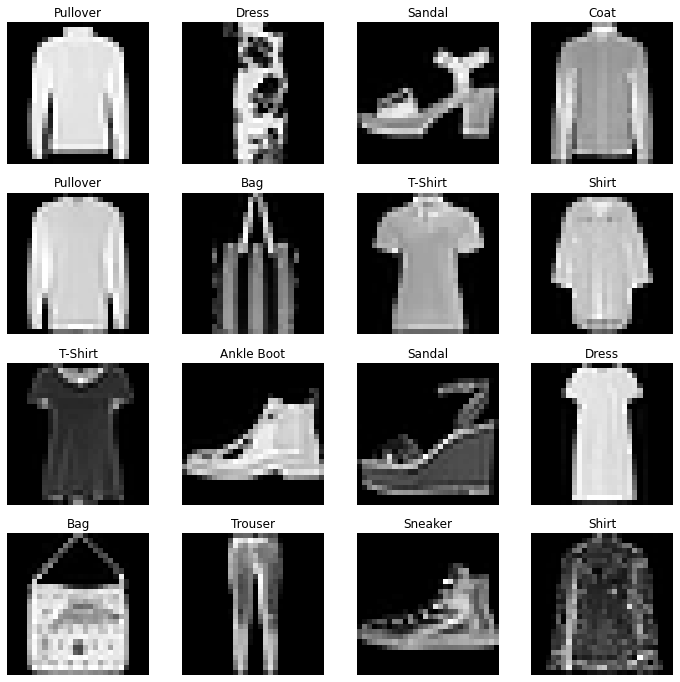

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()

- nn.Linear
 - 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모델
- nn.ReLu
 - 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 만든다.

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
    self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
    self.max2d = nn.MaxPool2d(2,2)
    self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
    self.conv2d_256 = nn.Conv2d(128,256,3,stride=2,padding=1)
    self.linear1 = nn.Linear(3*3*256, 256)
    self.linear2 = nn.Linear(256,64)
    self.linear3 = nn.Linear(64,10)
    self.batch2d1 = nn.BatchNorm2d(64)
    self.batch2d2 = nn.BatchNorm2d(256)
    self.batch1d = nn.BatchNorm1d(64)
    self.drop = nn.Dropout(p=0.3)
    self.flat = nn.Flatten()

  def forward(self,x):
    x = x.view(-1, 1, 28, 28)
    x = f.relu(self.conv2d_32(x))
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))
    x = f.relu(self.conv2d_256(x))
    x = self.batch2d2(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)
    x = f.relu(self.linear1(x))
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batch1d(x)
    x = f.log_softmax(self.linear3(x), dim = 1)
    return (x)

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


손실함수와 옵티마이저

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.008)

배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데, 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.

In [ ]:
for epoch in range(10):
  running_loss = 0.0 #초기화
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0


Epoch:1, iter:100, Loss:0.04915986996889114
Epoch:1, iter:200, Loss:0.0289655087441206
Epoch:1, iter:300, Loss:0.02530841587483883
Epoch:1, iter:400, Loss:0.022528542801737786
Epoch:2, iter:100, Loss:0.020587707817554472
Epoch:2, iter:200, Loss:0.018388912104070187
Epoch:2, iter:300, Loss:0.01828709826618433
Epoch:2, iter:400, Loss:0.017576678194105626
Epoch:3, iter:100, Loss:0.016426064617931842
Epoch:3, iter:200, Loss:0.016427971303462983
Epoch:3, iter:300, Loss:0.015621134139597415
Epoch:3, iter:400, Loss:0.015675203934311866
Epoch:4, iter:100, Loss:0.014418499864637852
Epoch:4, iter:200, Loss:0.015173134058713914
Epoch:4, iter:300, Loss:0.014774636216461658
Epoch:4, iter:400, Loss:0.013982325620949268
Epoch:5, iter:100, Loss:0.01316386566311121
Epoch:5, iter:200, Loss:0.013498358871787786
Epoch:5, iter:300, Loss:0.013862451359629631
Epoch:5, iter:400, Loss:0.013698493614792823
Epoch:6, iter:100, Loss:0.012874331891536712
Epoch:6, iter:200, Loss:0.01305273710936308
Epoch:6, iter:300

In [ ]:
PATH= './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
#모델 테스트
import numpy as np
import matplotlib.pyplot as plt

def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg, (1,2,0))) #RGB -> GBR
  plt.show()

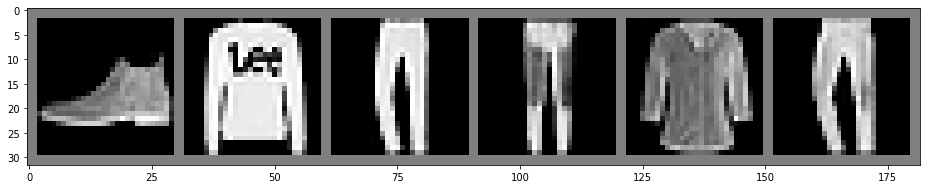

In [ ]:
import torchvision
images, labels = next(iter(test_loader))
imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
import torch.nn as nn

data = torch.randn((5,5))
print(data)
print(torch.max(data, dim=1))

tensor([[ 0.6983, -0.2062,  0.7907,  1.7367,  0.0269],
        [-0.6443,  0.5822, -1.1826, -1.1408, -0.1777],
        [ 0.7372, -0.8887, -0.9789, -1.0981, -0.5377],
        [ 1.0451,  0.2252,  0.6084,  1.0161, -0.0892],
        [-0.0985,  0.0556, -0.6012,  0.5866, -0.8407]])
torch.return_types.max(
values=tensor([1.7367, 0.5822, 0.7372, 1.0451, 0.5866]),
indices=tensor([3, 1, 0, 0, 3]))


In [ ]:
outputs = net(images)
print(outputs)
_, predicted = torch.max(outputs,1)
print(predicted)

tensor([[-3.2180e+01, -2.2211e+01, -3.7654e+01,  ..., -1.8111e+01,
         -3.4221e+01,  0.0000e+00],
        [-1.7741e+01, -2.8158e+01, -3.5667e-03,  ..., -2.5138e+01,
         -2.4177e+01, -2.4342e+01],
        [-8.0460e+00, -4.2430e-04, -9.8120e+00,  ..., -1.8556e+01,
         -1.1717e+01, -1.6400e+01],
        ...,
        [-7.0478e-03, -1.6518e+01, -7.3485e+00,  ..., -2.3282e+01,
         -1.2224e+01, -2.0539e+01],
        [-1.6524e+01, -1.7714e+01, -1.7928e+01,  ..., -3.3202e+01,
         -3.6955e-06, -2.7617e+01],
        [-1.1347e+01, -1.0279e+01, -4.0343e+00,  ..., -1.5933e+01,
         -1.0798e+01, -1.5322e+01]], grad_fn=<LogSoftmaxBackward0>)
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 6, 4, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1,
        4, 6, 4, 4, 5, 6, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100 * correct / total)

89.55


In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 데이터 전처리 
train_iamges, test_images = train_images / 255.0, test_images / 255.0

- Binary Cross Entropy
: Binary Cross Entropy 는 multi-label classification에서 사용하지만 2-class(true, false 혹은 0, 1 등등)의 제한적인 형태에서 사용된다. 모델에서 정의할 때 마지막에 dense를 2로 해주어야 한다. 그렇지 않으면 에러가 뜨니까 꼭 모델 만들 때 모든 레이어를 쌓고 마지막에 두 가지 갈래로 나오게끔 만들면 된다.

- Categorical Cross Entropy
: Categorical Cross Entropy는 데이터 label이 원-핫 인코딩 방식일 때 사용한다. 우리가 to_categorical을 죽어라 사용하는 것도 이것 때문일 확률이 높다.

- Sparse Categorical Cross Entropy
: Sparse Categorical Cross Entropy는 반대로 label이 정수일 때 사용한다. 기본적으로 데이터 셋이 제공될 때 label이 정수 형태를 띄고 있는 경우가 많은데 이럴 때 이 loss function을 사용한다.

In [ ]:
def model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(256, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(512, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='acc')
  
  return model

In [ ]:
model = model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 512)        0

In [ ]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 17s 4ms/step - loss: 0.6204 - acc: 0.7934
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3891 - acc: 0.8574
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3489 - acc: 0.8726
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - acc: 0.8823
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2969 - acc: 0.8910
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2768 - acc: 0.8969
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2578 - acc: 0.9030
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2488 - acc: 0.9087
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2333 - acc: 0.9139
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2245 - acc: 0.9173
Epoch 11/30
1875/1875 [=====

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 8.5536 - acc: 0.1385
8.553574562072754 0.13850000500679016


In [ ]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]), test_labels[0])
print(len(predictions))

313/313 [==============================] - 1s 2ms/step
[-30.077982 -27.379787 -15.284973 -13.74191  -19.387945  31.35376
 -32.83719   13.413588 -12.756908  16.241873]
5 9
10000
